<a href="https://colab.research.google.com/github/DivyamJain0212/EDA-Model-Fertility2/blob/main/Divyam_Jain_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing the Libraries**

In [3]:
import pandas as pd
import numpy as np

### **Loading the DataSet**

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/salemprakash/EDA/main/Data/Fertility2.csv')
df.head()

,rownames,morekids,gender1,gender2,age,afam,hispanic,other,work
0,1,no,female,female,35,no,no,no,40
1,2,no,female,male,33,no,no,no,52
2,3,no,female,female,28,no,no,no,12
3,4,no,male,male,28,no,no,no,0
4,5,no,female,male,31,no,no,no,0


### **Exploring Dimensions**

In [5]:
df.shape

(30000, 9)

In [6]:
df.describe()

,rownames,age,work
count,30000.000000,30000.000000,30000.000000
mean,15000.500000,30.354267,19.209500
std,8660.398374,3.383432,21.941018
min,1.000000,21.000000,0.000000
25%,7500.750000,28.000000,0.000000
50%,15000.500000,31.000000,6.000000
75%,22500.250000,33.000000,45.000000
max,30000.000000,35.000000,52.000000


In [7]:
df.dtypes

,0
rownames,int64
morekids,object
gender1,object
gender2,object
age,int64
afam,object
hispanic,object
other,object
work,int64


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   rownames  30000 non-null  int64 
 1   morekids  30000 non-null  object
 2   gender1   30000 non-null  object
 3   gender2   30000 non-null  object
 4   age       30000 non-null  int64 
 5   afam      30000 non-null  object
 6   hispanic  30000 non-null  object
 7   other     30000 non-null  object
 8   work      30000 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 2.1+ MB


In [9]:
#Checking unique values in each columns of the data
for i in df.columns:
    print(df[i].unique())

[    1     2     3 ... 29998 29999 30000]
['no' 'yes']
['female' 'male']
['female' 'male']
[35 33 28 31 25 34 21 30 32 29 26 24 27 23 22]
['no' 'yes']
['no' 'yes']
['no' 'yes']
[40 52 12  0 20 37 35 44 50 10 26  2 36 49 23  8 46 45 18 38 15  4 14 24
 48  3  1 13 51 30 42  7 34  9 31 11 16 25  6 41 17 28 29 39 32 22 27  5
 21 33 19 47 43]


In [10]:
#Checking if there are any duplicated rows in our dataset
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
29995,False
29996,False
29997,False
29998,False


In [11]:
duplicated_rows = df.duplicated().sum()
print("Total number of duplicated rows:",duplicated_rows)

Total number of duplicated rows: 0


*The above shows that there are no duplicate rows in our dataset*

**Checking for missing data or null values**



In [12]:
missing_val = df.isnull().sum().sum()
print("Total number of missing values are",missing_val)

Total number of missing values are 0


No missing values are there in our dataset. Therefore there is no need of data cleaning

# **Discretization and binning of Data**

Making a new column that categorises people based on their ages like old, young or middle aged.

In [13]:
#Creating a new column binning different age groups
age_labels = ['young', 'middle-aged', 'old']
df['age_group'] = pd.qcut(df['age'],3, labels=age_labels)
df.head()

,rownames,morekids,gender1,gender2,age,afam,hispanic,other,work,age_group
0,1,no,female,female,35,no,no,no,40,old
1,2,no,female,male,33,no,no,no,52,old
2,3,no,female,female,28,no,no,no,12,young
3,4,no,male,male,28,no,no,no,0,young
4,5,no,female,male,31,no,no,no,0,middle-aged


# **Univariate Analysis**

Exploring different variables in a dataset seperately

In [14]:
#importing the libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
#Descriptive Statistics
#Calculating the measure of central tendency of the age column.
mean = df['age'].mean()
median = df['age'].median()
mode = df['age'].mode()
print("Mean of age:",mean)
print("Median of age:",median)
print("Mode of age:",mode)

Mean of age: 30.354266666666668
Median of age: 31.0
Mode of age: 0    33
Name: age, dtype: int64


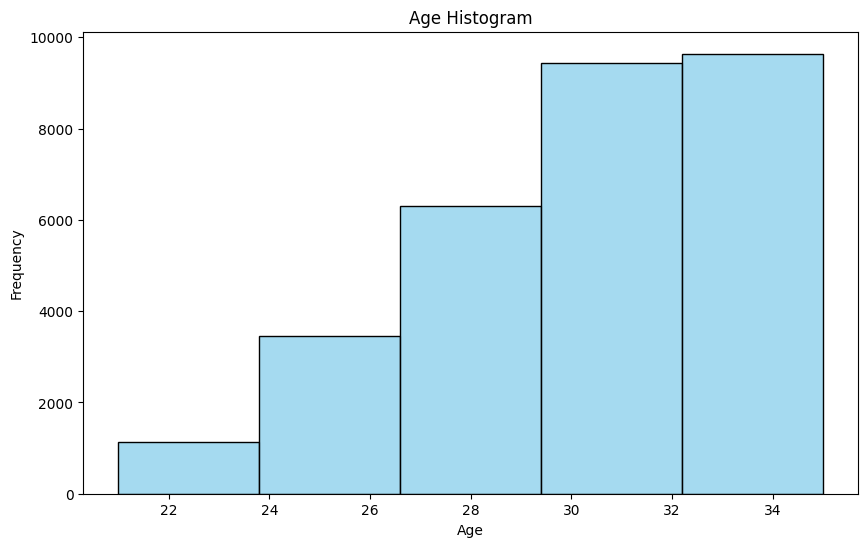

In [16]:
#Histogram of Age
plt.figure(figsize=(10, 6))
sns.histplot(df['age'],bins=5, color='skyblue')
plt.title('Age Histogram - 21BDS0009')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

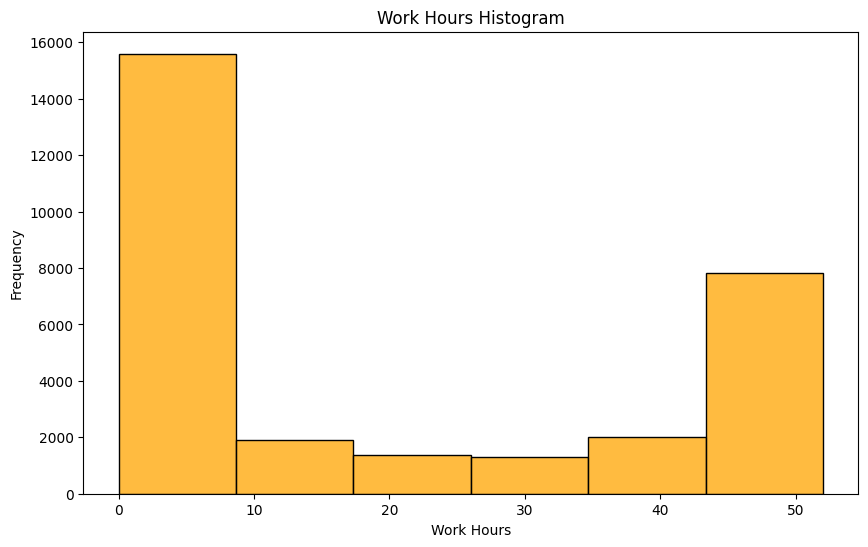

In [17]:
#Histogram of Word Hours
plt.figure(figsize=(10, 6))
sns.histplot(df['work'],bins=6, color='orange')
plt.title('Work Hours Histogram - 21BDS0009')
plt.xlabel('Work Hours')
plt.ylabel('Frequency')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


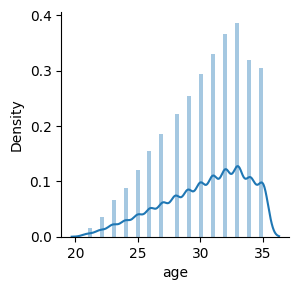

In [18]:
sns.FacetGrid(df).map(sns.distplot,'age').add_legend()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


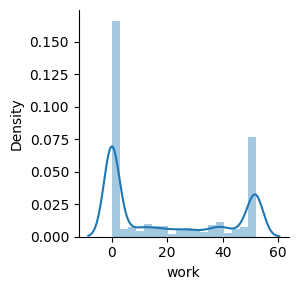

In [19]:
sns.FacetGrid(df).map(sns.distplot,'work').add_legend()


<ipython-input-20-99e53138c903>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender1', data=df, palette='Set2')


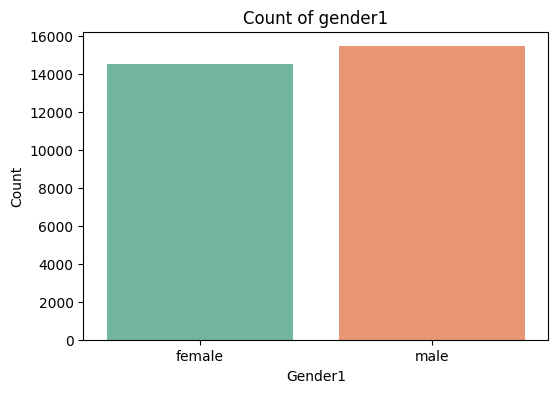

In [20]:
plt.figure(figsize=(6, 4))
sns.countplot(x='gender1', data=df, palette='Set2')
plt.title('Count of gender1 - 21BDS0009')
plt.xlabel('Gender1')
plt.ylabel('Count')
plt.show()

<ipython-input-21-087bd01edc26>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender2', data=df, palette='Set1')


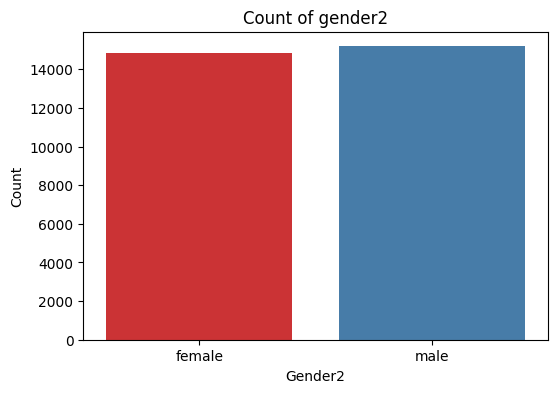

In [21]:
plt.figure(figsize=(6, 4))
sns.countplot(x='gender2', data=df, palette='Set1')
plt.title('Count of gender2 - 21BDS0009')
plt.xlabel('Gender2')
plt.ylabel('Count')
plt.show()

<ipython-input-22-a0bab161444f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='afam', data=df, palette=['orchid','khaki'])


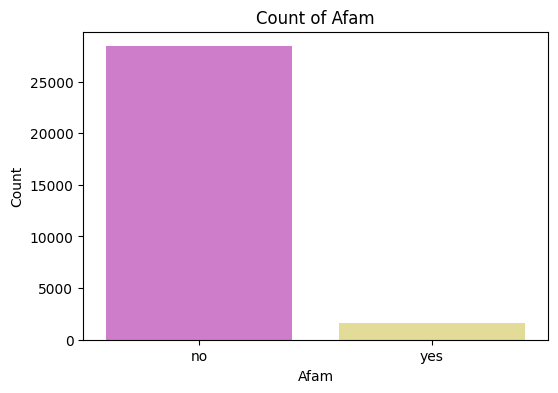

In [22]:
plt.figure(figsize=(6, 4))
sns.countplot(x='afam', data=df, palette=['orchid','khaki'])
plt.title('Count of Afam - 21BDS0009')
plt.xlabel('Afam')
plt.ylabel('Count')
plt.show()

<ipython-input-23-dafb52708ae3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='other', data=df, palette=['lightblue','teal'])


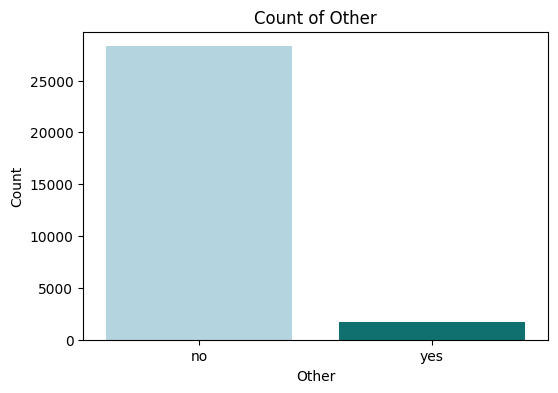

In [23]:
plt.figure(figsize=(6, 4))
sns.countplot(x='other', data=df, palette=['lightblue','teal'])
plt.title('Count of Other - 21BDS0009')
plt.xlabel('Other')
plt.ylabel('Count')
plt.show()

<ipython-input-24-4903971274ae>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='hispanic', data=df, palette=['lightcoral','pink'])


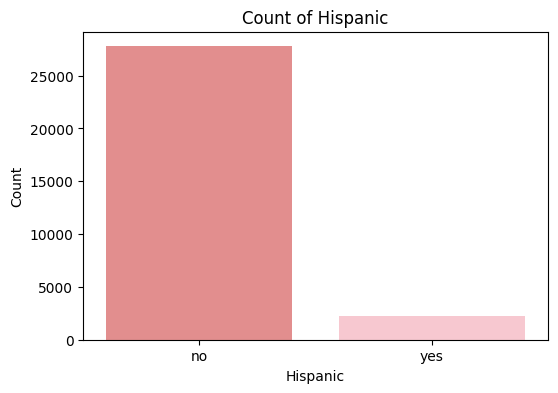

In [24]:
plt.figure(figsize=(6, 4))
sns.countplot(x='hispanic', data=df, palette=['lightcoral','pink'])
plt.title('Count of Hispanic - 21BDS0009')
plt.xlabel('Hispanic')
plt.ylabel('Count')
plt.show()

<ipython-input-25-5434a4a80a8f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='morekids', data=df, palette='Set3')


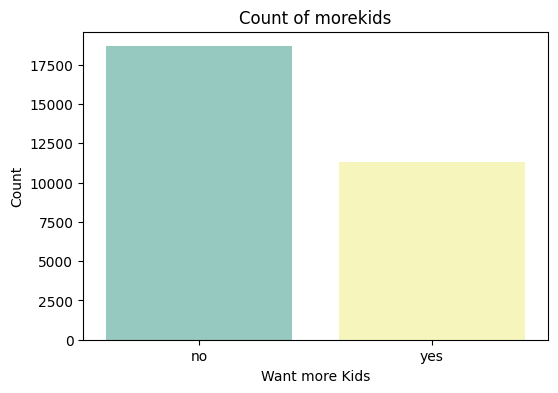

In [25]:
plt.figure(figsize=(6, 4))
sns.countplot(x='morekids', data=df, palette='Set3')
plt.title('Count of morekids - 21BDS0009')
plt.xlabel('Want more Kids')
plt.ylabel('Count')
plt.show()

<ipython-input-26-91e7f44137ec>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="age",data=df,palette="Set2")


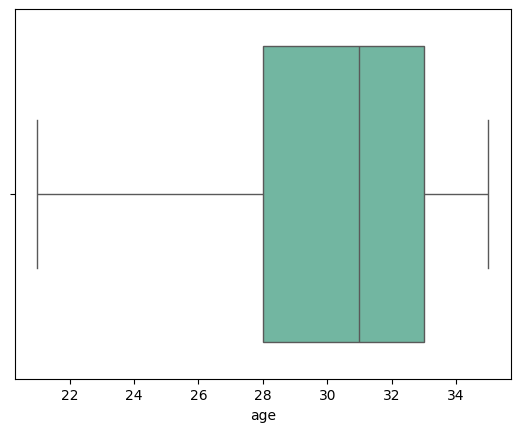

In [26]:
#Box Plots
sns.boxplot(x="age",data=df,palette="Set2")
plt.show()

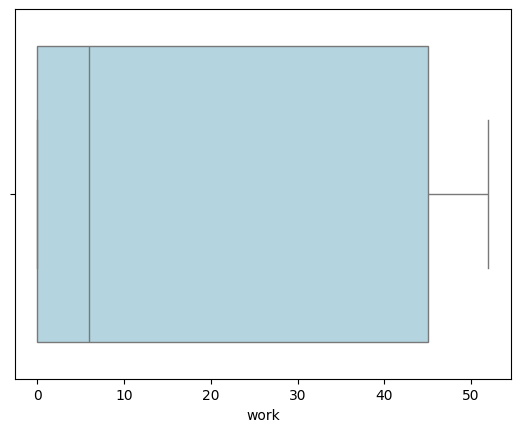

In [27]:
sns.boxplot(x="work",data=df,color="lightblue")
plt.show()

# **Bivariate Analysis**


Exploring two variables in the dataset at the same time

Text(0, 0.5, 'Age')

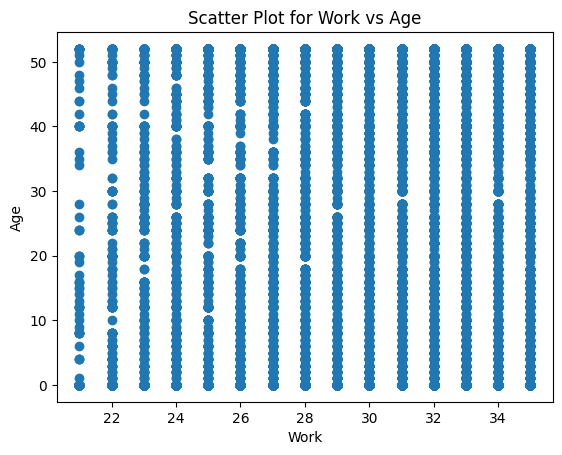

In [28]:
plt.scatter(df["age"], df["work"])
plt.title("Scatter Plot for Work vs Age - 21BDS0009")
plt.xlabel("Work")
plt.ylabel("Age")

<ipython-input-29-340f699edc85>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='age', y='morekids', data=df,palette='Set3')


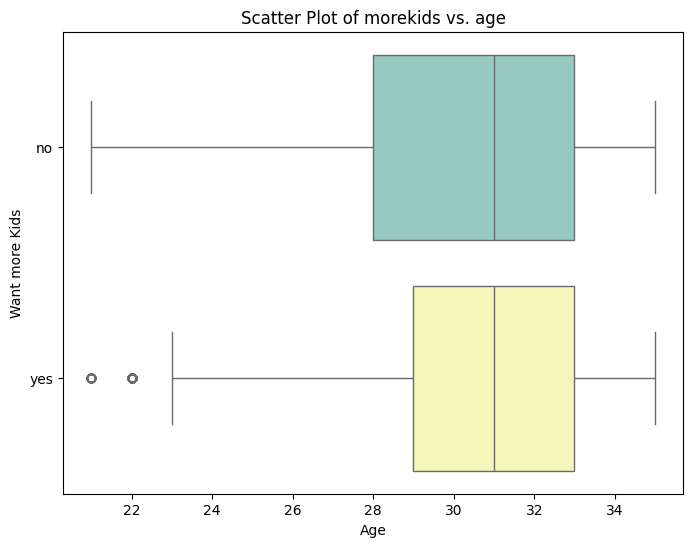

In [29]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='age', y='morekids', data=df,palette='Set3')
plt.title('Scatter Plot of morekids vs. age - 21BDS0009')
plt.xlabel('Age')
plt.ylabel('Want more Kids')
plt.show()

<ipython-input-30-3b2214cf0edd>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='age', y='hispanic', data=df,palette = ['lightblue','teal'])


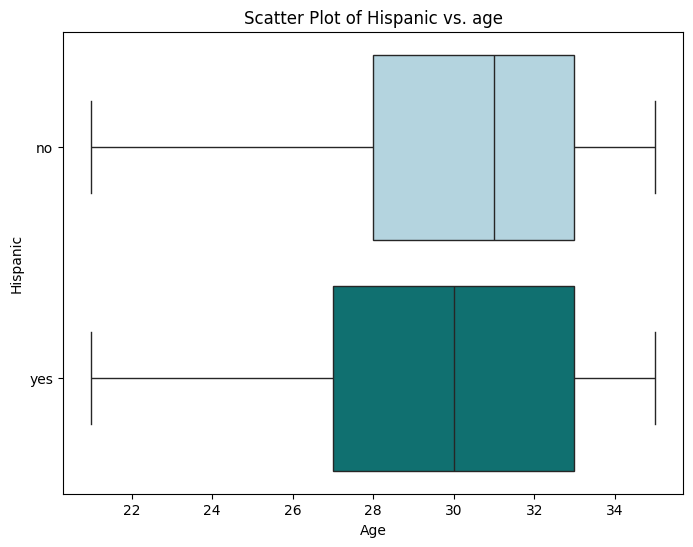

In [30]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='age', y='hispanic', data=df,palette = ['lightblue','teal'])
plt.title('Scatter Plot of Hispanic vs. age - 21BDS0009')
plt.xlabel('Age')
plt.ylabel('Hispanic')
plt.show()

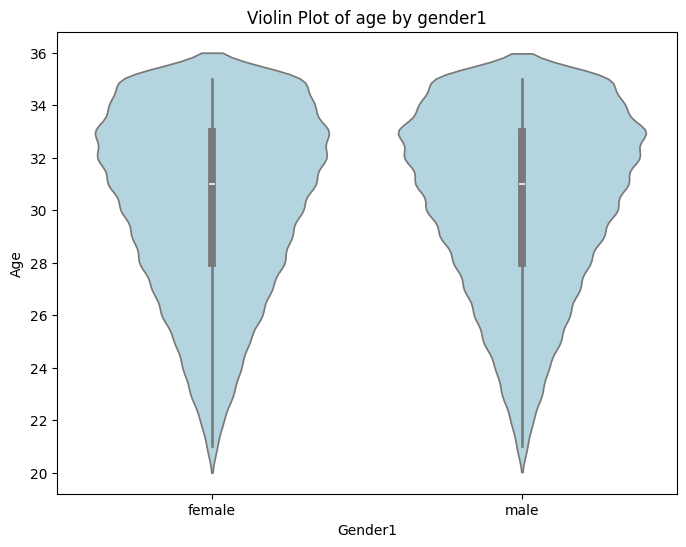

In [31]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='gender1', y='age', data=df,color='lightblue')
plt.title('Violin Plot of age by gender1 - 21BDS0009')
plt.xlabel('Gender1')
plt.ylabel('Age')
plt.show()

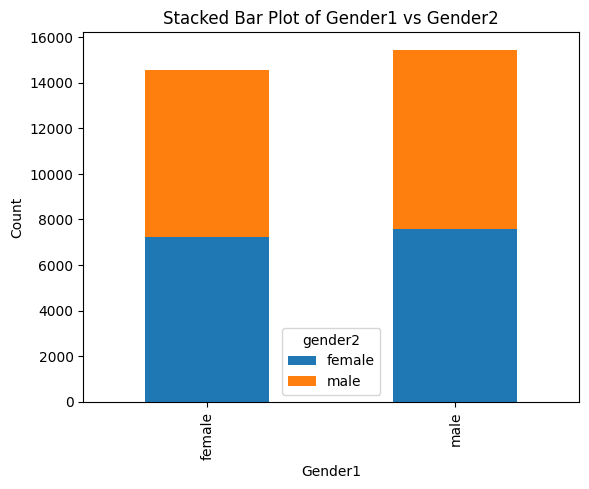

In [32]:
gender_counts = pd.crosstab(df['gender1'], df['gender2'])
gender_counts.plot(kind='bar', stacked=True)
plt.title('Stacked Bar Plot of Gender1 vs Gender2 - 21BDS0009')
plt.xlabel('Gender1')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='age', ylabel='Density'>

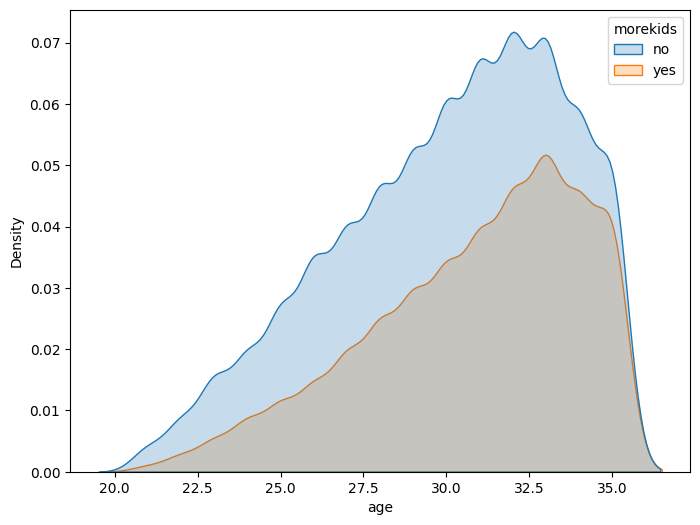

In [33]:
plt.figure(figsize=(8,6))
sns.kdeplot(data=df,x='age',hue='morekids',fill=True)

<Axes: xlabel='gender1', ylabel='count'>

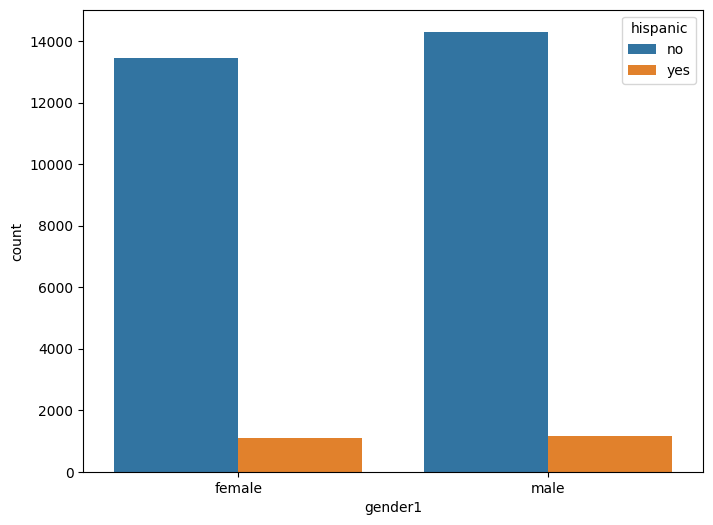

In [34]:
plt.figure(figsize=(8,6))
sns.countplot(data=df,x='gender1',hue='hispanic')

<Axes: xlabel='gender2', ylabel='count'>

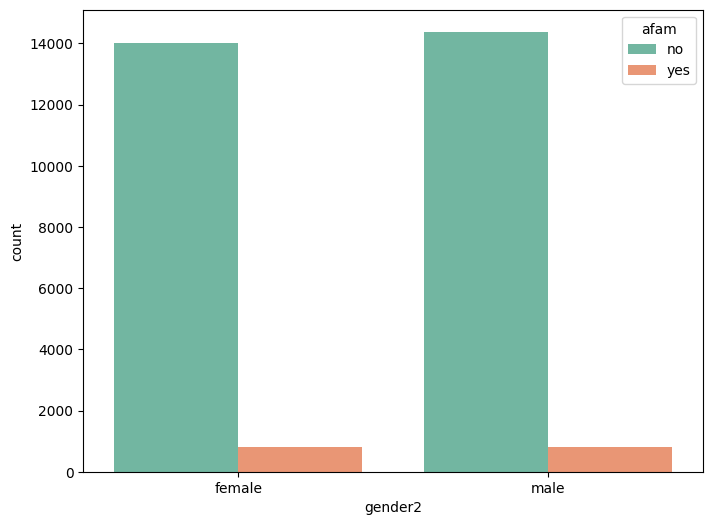

In [35]:
plt.figure(figsize=(8,6))
sns.countplot(data=df,x='gender2',hue='afam',palette='Set2')

# **Multivariate Analysis**

Exploring more than two variables in the dataset simulatenously

<Figure size 800x600 with 0 Axes>

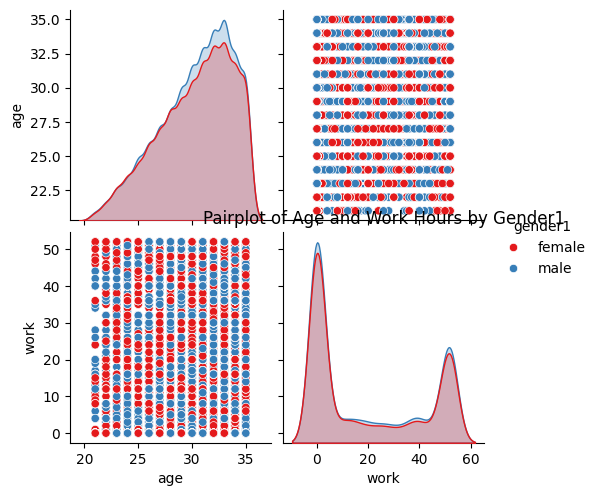

In [36]:
plt.figure(figsize=(8,6))
sns.pairplot(df, vars=['age', 'work'], hue='gender1', palette='Set1')
plt.title('Pairplot of Age and Work Hours by Gender1 - 21BDS0009')
plt.show()

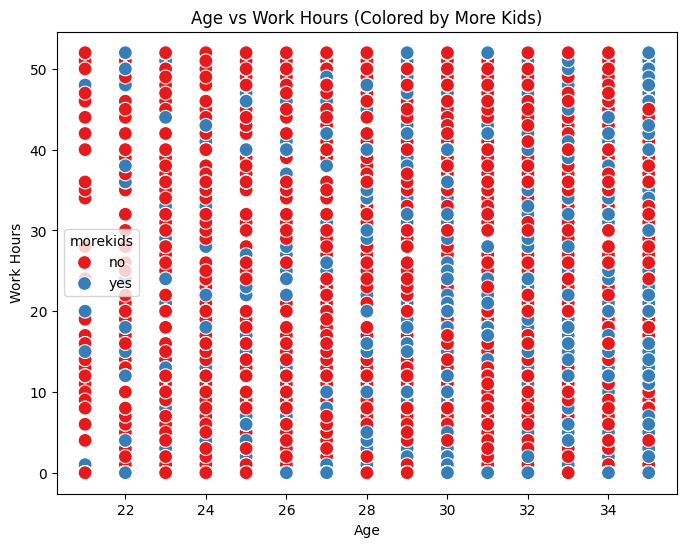

In [37]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='work', hue='morekids', data=df, palette='Set1', s=100)
plt.title('Age vs Work Hours (Colored by More Kids) - 21BDS0009')
plt.xlabel('Age')
plt.ylabel('Work Hours')
plt.show()

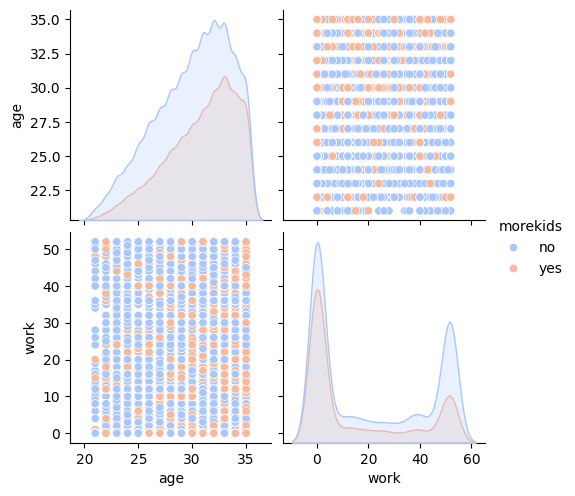

In [38]:
sns.pairplot(df, hue='morekids', vars=['age', 'work'], palette='coolwarm')
plt.show()

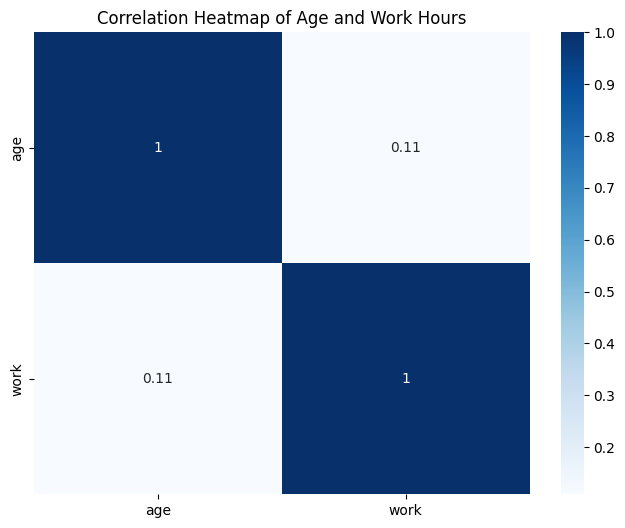

In [39]:
plt.figure(figsize=(8, 6))
corr = df[['age', 'work']].corr()
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title('Correlation Heatmap of Age and Work Hours - 21BDS0009')
plt.show()

# **Clustering**

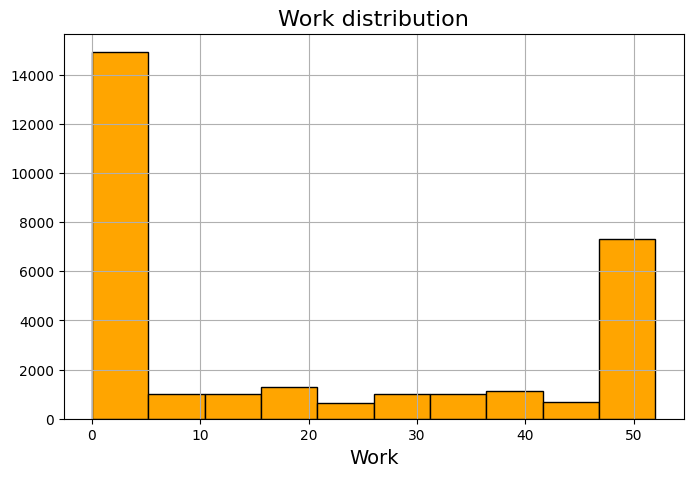

In [40]:
plt.figure(figsize=(8,5))
plt.title("Work distribution - 21BDS0009",fontsize=16)
plt.xlabel("Work",fontsize=14)
plt.grid(True)
plt.hist(df['work'],color='orange',edgecolor='k')
plt.show()

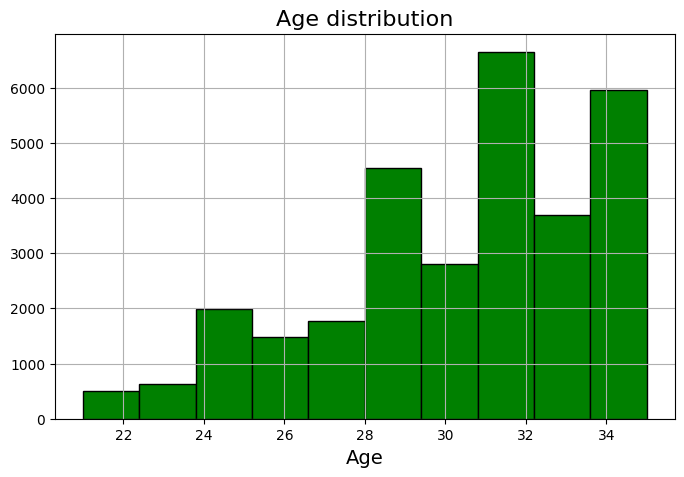

In [41]:
plt.figure(figsize=(8,5))
plt.title("Age distribution - 21BDS0009",fontsize=16)
plt.xlabel ("Age",fontsize=14)
plt.grid(True)
plt.hist(df['age'],color='green',edgecolor='k')
plt.show()

### **K Means Clustering**

In [42]:
X = df.iloc[:,[4,8]].values

In [43]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

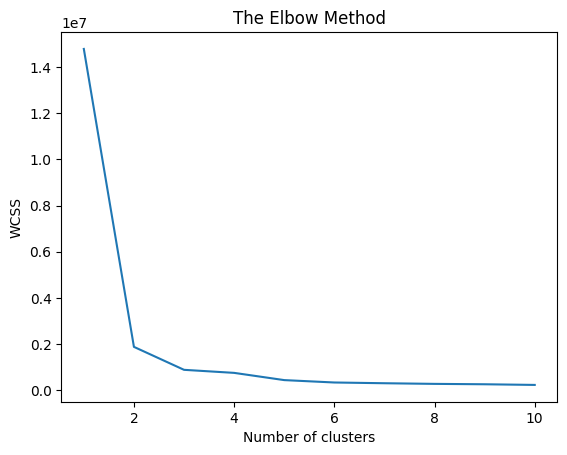

In [44]:

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [45]:
kmeans = KMeans(n_clusters=3)
kmeans_labels = kmeans.fit_predict(scaled_features)

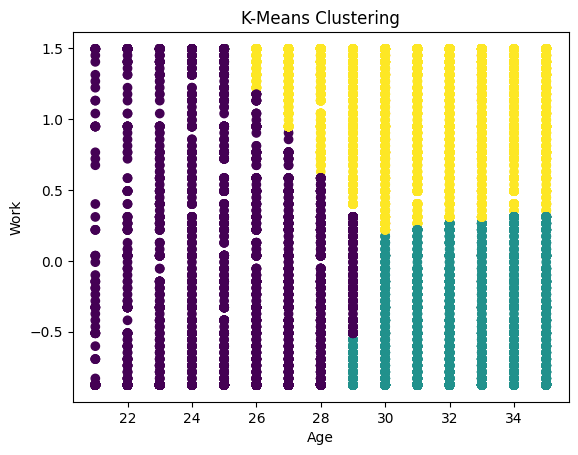

In [46]:
plt.scatter(X[:, 0], scaled_features[:, 1], c=kmeans_labels, cmap='viridis')
plt.title("K-Means Clustering - 21BDS0009")
plt.xlabel("Age")
plt.ylabel("Work")
plt.show()

### **Hierarchical Clustering**

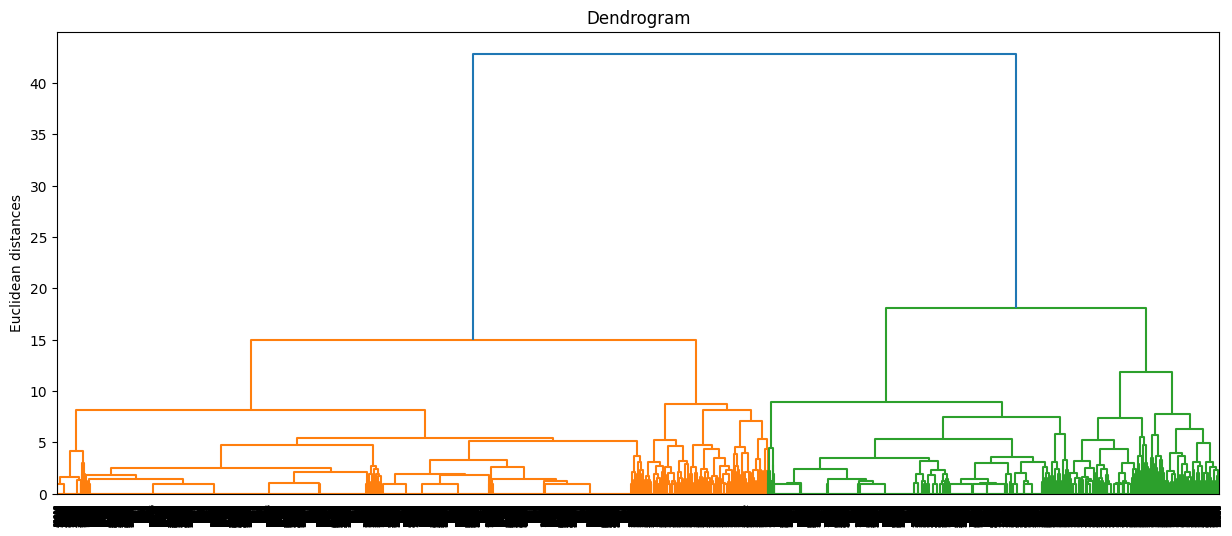

In [ ]:
import scipy.cluster.hierarchy as sch
import sys
sys.setrecursionlimit(10000)

plt.figure(figsize=(15,6))
plt.title('Dendrogram - 21BDS0009')
plt.ylabel('Euclidean distances')
#plt.grid(True)
dendrogram = sch.dendrogram(sch.linkage(X, method = 'average'))
plt.show()

### **DBSCAN Clustering**

In [47]:
dbscan = DBSCAN(eps=0.5, min_samples=2)
dbscan_labels = dbscan.fit_predict(X)

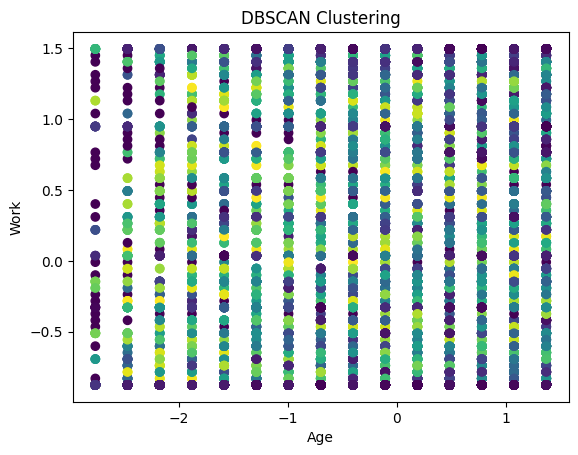

In [ ]:
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=dbscan_labels, cmap='viridis')
plt.title("DBSCAN Clustering - 21BDS0009")
plt.xlabel("Age")
plt.ylabel("Work")
plt.show()

# **Regression Models**

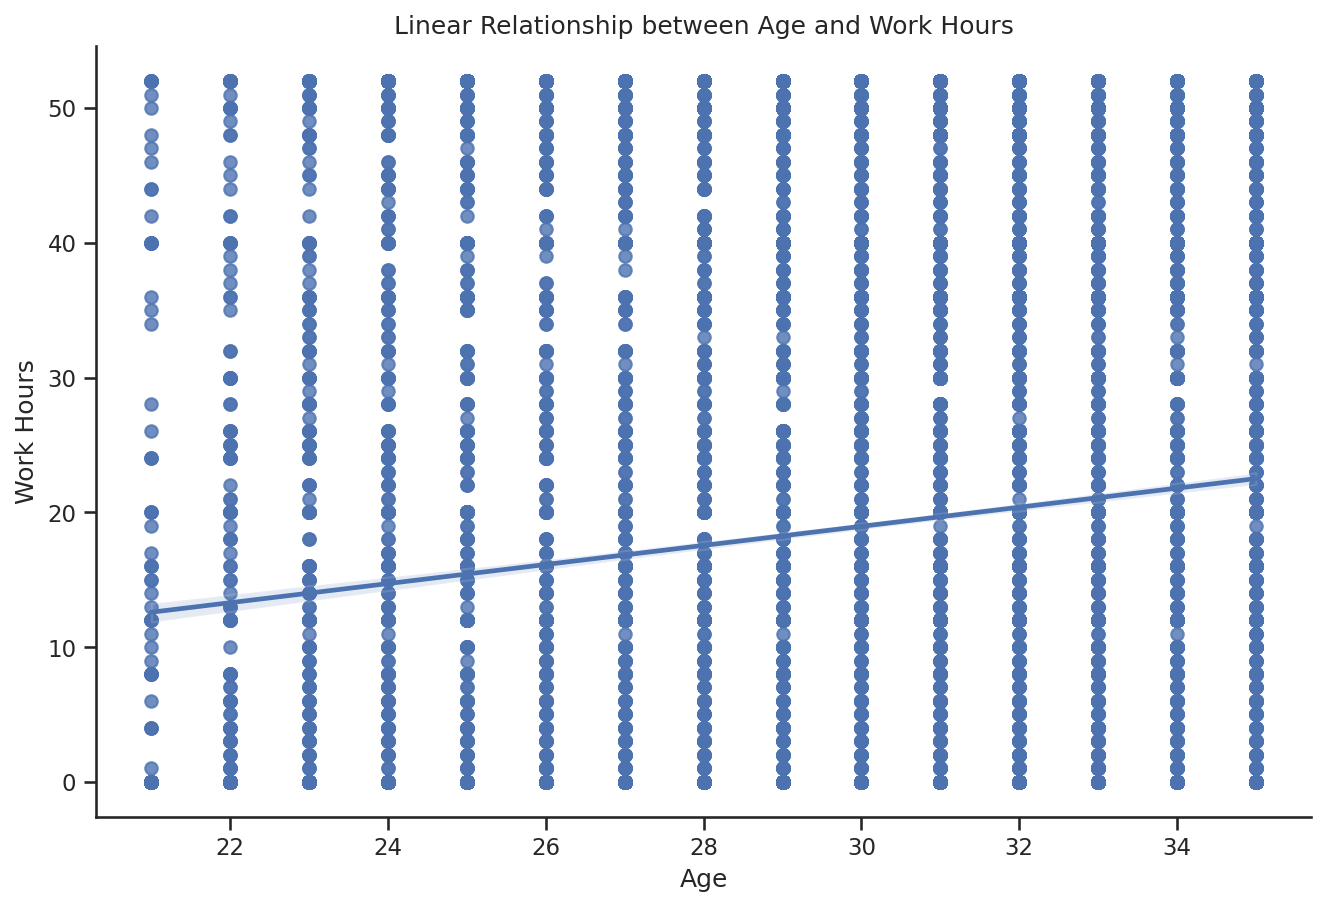

In [68]:
sns.lmplot(x='age', y='work', data=df, aspect=1.5, height=6)
plt.title("Linear Relationship between Age and Work Hours - 21BDS0009")
plt.xlabel("Age")
plt.ylabel("Work Hours")
plt.show()

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression

In [51]:
le = LabelEncoder()
df['morekids'] = le.fit_transform(df['morekids'])
df['gender1'] = le.fit_transform(df['gender1'])
df['gender2'] = le.fit_transform(df['gender2'])

In [52]:
X = df[['morekids', 'gender1', 'gender2', 'age']]
y = df['work']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [55]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [74]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
model.score(X_test, y_test)

0.02777337440059391

In [75]:
y_pred=model.predict(X_test)

evaluate = pd.DataFrame({'Actual': y_test.values.flatten(),
'Predicted': y_pred.flatten()})
evaluate.head(10)

,Actual,Predicted
0,0,23.429351
1,52,23.429351
2,7,22.173474
3,36,22.609479
4,52,21.831664
5,0,16.667788
6,48,20.627925
7,52,18.307532
8,52,23.813218
9,0,15.070101


<Axes: >

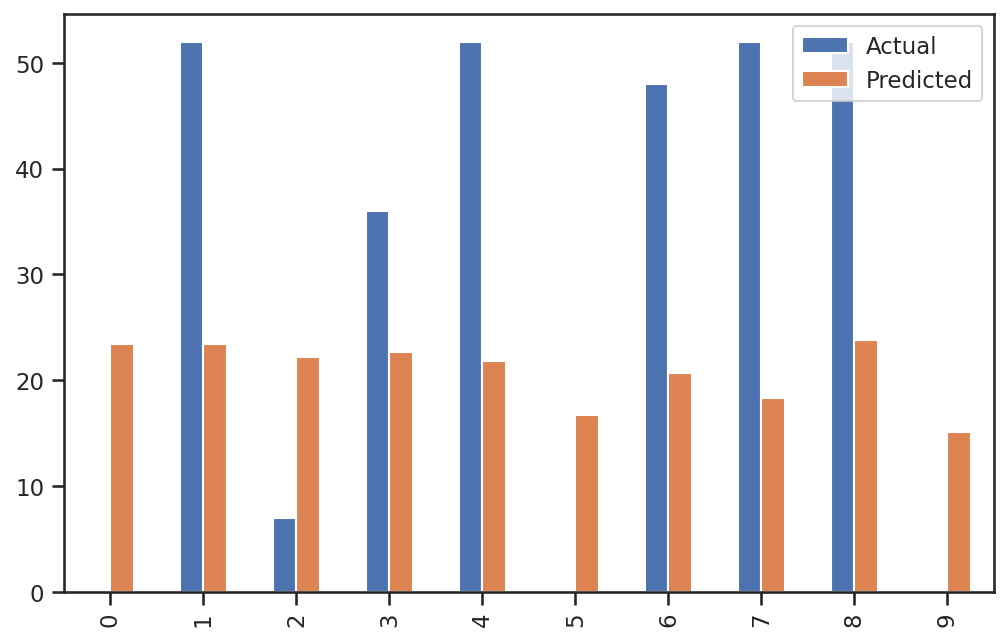

In [81]:
evaluate.head(10).plot(kind = 'bar')

In [79]:
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print(f"MAE score: {mean_absolute_error(y_test, y_pred)}")
print("Intercept:", model.intercept_)

Mean Squared Error: 468.3687377440513
R-squared: 0.02777337440059391
MAE score: 19.734784676660905
Intercept: -3.24255625037247


In [58]:
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)

          Coefficient
morekids    -6.761563
gender1      0.436005
gender2     -0.341810
age          0.819872


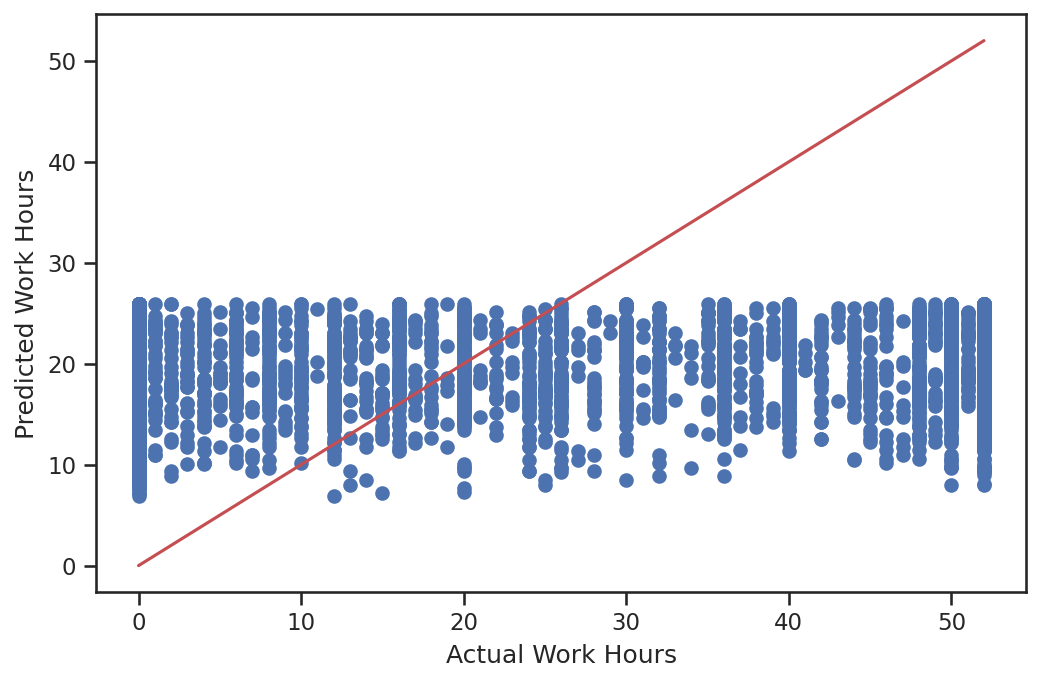

In [59]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Work Hours")
plt.ylabel("Predicted Work Hours")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r')
plt.show()